In [18]:
import zipfile
import os


# Paths to the zip files
train_zip = '/kaggle/input/dogs-vs-cats/train.zip'
test_zip = '/kaggle/input/dogs-vs-cats/test1.zip'

# Destination folder
unzip_dir = '/kaggle/working/dogs-vs-cats'
os.makedirs(unzip_dir, exist_ok=True)

# Unzip train.zip
with zipfile.ZipFile(train_zip, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# Unzip test1.zip (optional if you want to test predictions)
with zipfile.ZipFile(test_zip, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print("Unzipping completed!")


Unzipping completed!


In [19]:
import os

train_dir = '/kaggle/working/dogs-vs-cats/train'
print("Total training images:", len(os.listdir(train_dir)))
print("First 10 files:", os.listdir(train_dir)[:10])


Total training images: 25000
First 10 files: ['dog.6847.jpg', 'dog.7443.jpg', 'cat.6375.jpg', 'cat.5930.jpg', 'dog.6772.jpg', 'cat.1309.jpg', 'dog.8062.jpg', 'cat.10461.jpg', 'dog.1211.jpg', 'cat.5115.jpg']


In [20]:
import shutil
from sklearn.model_selection import train_test_split

base_dir='/kaggle/working/cats_dogs'
os.makedirs(base_dir,exist_ok=True)

 #Create subfolders
for split in ['train', 'validation']:
    for cls in ['cats', 'dogs']:
        os.makedirs(os.path.join(base_dir, split, cls), exist_ok=True)

# List all files
all_files = os.listdir(train_dir)
cats = [f for f in all_files if 'cat' in f]
dogs = [f for f in all_files if 'dog' in f]

#split
train_cats,val_cats=train_test_split(cats,test_size=0.2,random_state=42)
train_dogs,val_dogs=train_test_split(dogs,test_size=0.2,random_state=42)

# Copy files
for f in train_cats:
    shutil.copy(os.path.join(train_dir, f), os.path.join(base_dir, 'train/cats', f))
for f in val_cats:
    shutil.copy(os.path.join(train_dir, f), os.path.join(base_dir, 'validation/cats', f))
for f in train_dogs:
    shutil.copy(os.path.join(train_dir, f), os.path.join(base_dir, 'train/dogs', f))
for f in val_dogs:
    shutil.copy(os.path.join(train_dir, f), os.path.join(base_dir, 'validation/dogs', f))

print("Dataset organized successfully!")

#cats_dogs/
    #train/
        #cats/   <-- 80% of cat images
       # dogs/   <-- 80% of dog images
    #validation/
        #cats/   <-- 20% of cat images
        #dogs/   <-- 20% of dog images  

Dataset organized successfully!


In [22]:
# Normalize image and prepare batch for training 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

train_generator =train_datagen.flow_from_directory(
    os.path.join(base_dir,'train'),
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_genrator=val_datagen.flow_from_directory(
    os.path.join(base_dir,'validation'),
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [32]:
# training a model
history=model.fit(
    train_generator,
    validation_data=validation_genrator,
    epochs=20
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1769861922.486186     117 service.cc:152] XLA service 0x7f37780060b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1769861922.486226     117 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1769861922.486230     117 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1769861922.908346     117 cuda_dnn.cc:529] Loaded cuDNN version 91002


  5/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.5256 - loss: 2.2496

I0000 00:00:1769861926.110556     117 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.6196 - loss: 0.7532 - val_accuracy: 0.7428 - val_loss: 0.5189
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.7726 - loss: 0.4723 - val_accuracy: 0.7392 - val_loss: 0.5435
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.8438 - loss: 0.3516 - val_accuracy: 0.7716 - val_loss: 0.4990
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - accuracy: 0.9129 - loss: 0.2182 - val_accuracy: 0.7848 - val_loss: 0.5894
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.9683 - loss: 0.0944 - val_accuracy: 0.7852 - val_loss: 0.8116
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - accuracy: 0.9869 - loss: 0.0405 - val_accuracy: 0.7758 - val_loss: 1.0531
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.9948 - loss: 0.0208 - val_accuracy: 0.7768 - val_loss: 1.1586
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.9887 - loss: 0.0349 - val_accurac

In [33]:
test_dir = '/kaggle/working/dogs-vs-cats/test1'
test_images = os.listdir(test_dir)[:5]  # preview first 5
print(test_images)


['3232.jpg', '3639.jpg', '4292.jpg', '3612.jpg', '9042.jpg']


In [34]:
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])


Training accuracy: 0.9962499737739563
Validation accuracy: 0.7645999789237976


/tmp/ipykernel_55/2570293452.py:34: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


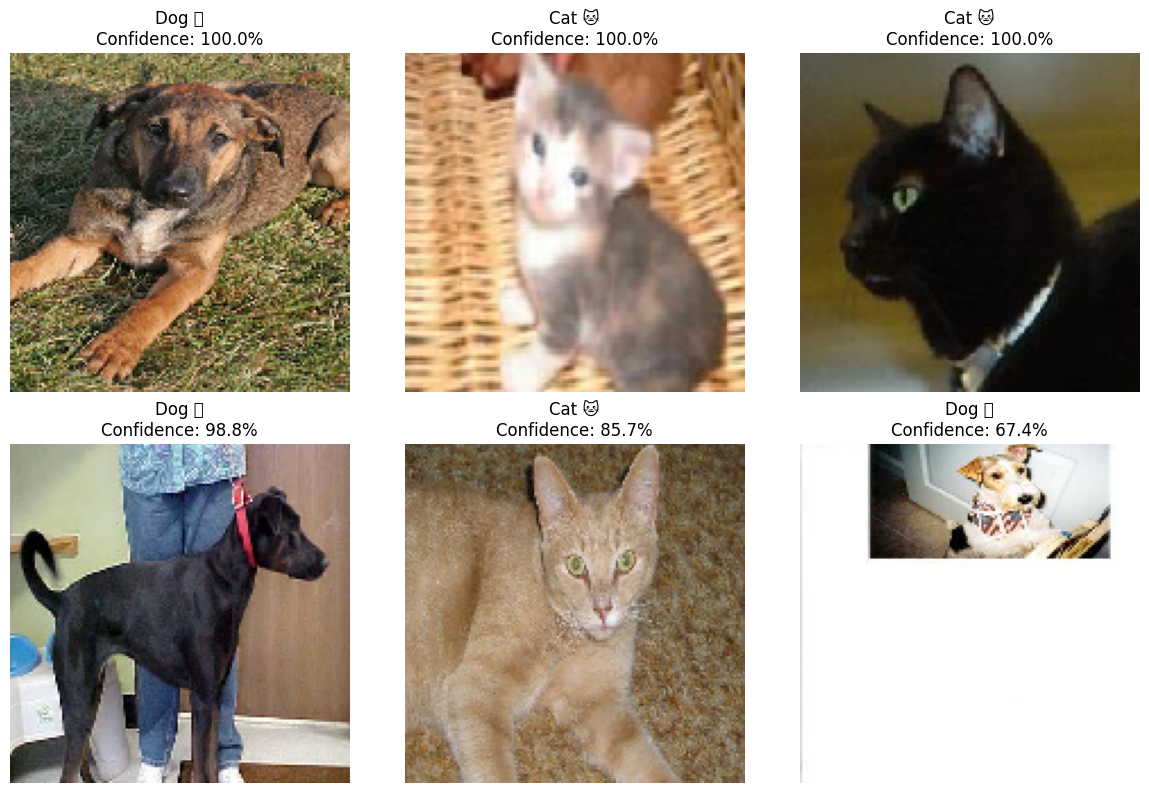

In [37]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to test images
test_dir = '/kaggle/working/dogs-vs-cats/test1'

#  Randomly select 6 images
random_images = random.sample(os.listdir(test_dir), 6)

plt.figure(figsize=(12, 8))

for i, img_name in enumerate(random_images):
    img_path = os.path.join(test_dir, img_name)

    # Load image
    img = image.load_img(img_path, target_size=(150,150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array, verbose=0)[0][0]
    label = "Dog 🐶" if prediction > 0.5 else "Cat 🐱"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    # Plot
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"{label}\nConfidence: {confidence*100:.1f}%")
    plt.axis('off')

plt.tight_layout()
plt.show()



In [38]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 66.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 98.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [39]:
model.save("model.h5")


In [40]:
import os

# Make sure folder exists
os.makedirs("models", exist_ok=True)

# Save your trained model
model.save("models/model.h5")


In [41]:
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

# Load model
model = load_model("models/model.h5")

st.title("🐶🐱 Dog vs Cat Classifier")
st.write("Upload an image or paste a screenshot to classify.")

# Upload image
uploaded_file = st.file_uploader(
    "Choose an image...",
    type=["jpg", "jpeg", "png"]
)

if uploaded_file is not None:
    # Display image
    img = Image.open(uploaded_file)
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Preprocess
    img = img.resize((150,150))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)[0][0]
    label = "Dog 🐶" if prediction > 0.5 else "Cat 🐱"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    st.subheader(f"Prediction: {label}")
    st.write(f"Confidence: {confidence*100:.2f}%")


2026-01-31 12:38:37.838 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-31 12:38:38.178 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-01-31 12:38:38.179 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-31 12:38:38.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-31 12:38:38.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-31 12:38:38.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-31 12:38:38.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-31 12:38:38.182 Thread 'MainThread': mi